# PHYS 372 Assignment 5

## 1)

$$
\begin{aligned}
    k&=\frac{\hbar\omega}{E_1^{(0)}} \\
    E_1^{(0)}&=\frac{\pi^2\hbar^2}{2ma^2} \\
    k&=\frac{\hbar\omega}{\pi^2\hbar^2}(2ma^2) \\
    &=\frac{2m\omega a^2}{\pi^2\hbar} \\
    \omega&=\frac{\pi^2\hbar k}{2ma^2}
\end{aligned}
$$

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from numpy import pi
from scipy.constants import hbar, m_e

m = m_e
a = 10e-6 # m
k = 50 # N/m

omega = pi ** 2 * hbar * k / (2 * m * a ** 2)

## 2)

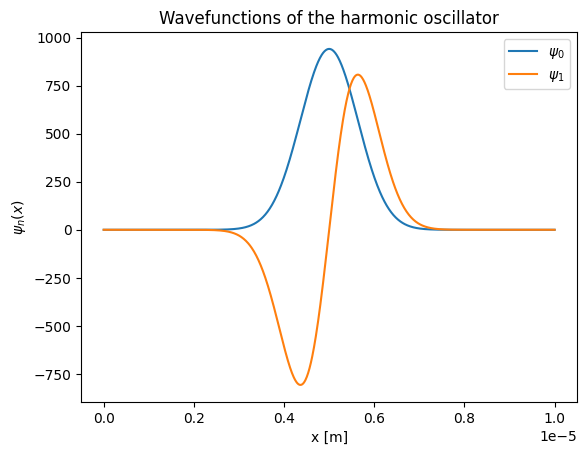

In [2]:
def psi_HO(n):

    xi_x = lambda x: np.sqrt(m * omega / hbar) * (x - a /2)
    
    return lambda x: (m * omega / pi / hbar) ** (1/4) \
                     / np.sqrt(2 ** n * scipy.special.factorial(n)) \
                     * scipy.special.hermite(n)(xi_x(x)) * np.exp(-xi_x(x) ** 2 / 2)

xs = np.linspace(0, a, num=1000)
psi_0 = psi_HO(0)(xs)
psi_1 = psi_HO(1)(xs)

plt.plot(xs, psi_0, label="$\\psi_0$")
plt.plot(xs, psi_1, label="$\\psi_1$")
plt.legend()
plt.title("Wavefunctions of the harmonic oscillator")
plt.xlabel("x [m]")
plt.ylabel("$\\psi_n(x)$")
plt.show()


## 3)

In [3]:
N = 100

## 4)

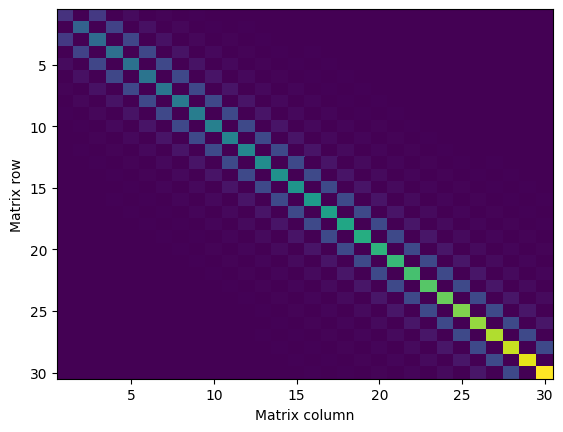

In [4]:
def g_nm(n, m):

    return ((-1) ** (n + m) + 1) / 4 * (1 / (n - m) ** 2 - 1 / (n + m) ** 2)

def h_nm(n, m):

    if n == m:

        return n ** 2 + pi ** 2 / 48 * k ** 2 * (1 - 6 / (pi * n) ** 2)
    
    return k ** 2 * g_nm(n, m)

def h_matrix(npts):

    return np.array([
                np.array([
                    h_nm(n, m) for m in range(1, npts + 1)
                ]) 
            for n in range(1, npts + 1)]
        )

n = 30 # truncation for plotting
h = h_matrix(n)
x = np.array([n for n in range(1, n + 1)])
y = np.array([m for m in range(1, n + 1)])

plt.pcolor(x, y, h)
plt.gca().invert_yaxis()
plt.xlabel("Matrix column")
plt.ylabel("Matrix row")
plt.show()


## 5) and 6)

$$
\begin{aligned}
    H_{nm}&=E_1^{(0)}h_{nm} \\
    H\ket{\Psi}&=E\ket{\Psi} \\
    hE_1^{(0)}\ket{\Psi}&=E\ket{\Psi}
\end{aligned}
$$

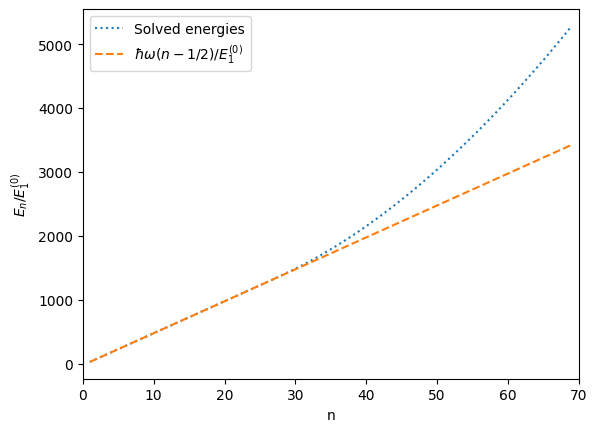

In [5]:
E_1 = pi ** 2 * hbar ** 2 / 2 / m / a ** 2
H = h_matrix(N) * E_1

E, psi_vec = scipy.linalg.eigh(H)

n_list = np.array([n for n in range(1, N + 1)])
E_E1 = E / E_1
E_HO = hbar * omega * (n_list - 1/2) / E_1

plt.plot(n_list[0:69], E_E1[0:69], label="Solved energies", linestyle="dotted")
plt.plot(n_list[0:69], E_HO[0:69], label="$\\hbar\\omega(n-1/2)/E_1^{(0)}$", linestyle="dashed")
plt.xlim(0, 70)
plt.xlabel("n")
plt.ylabel("$E_n/E_1^{(0)}$")
plt.legend()
plt.show()

## 7)

$$
\begin{aligned}
    \ket\psi&=\sum_{m=1}^\infty c_m\ket{\psi_m}
\end{aligned}
$$

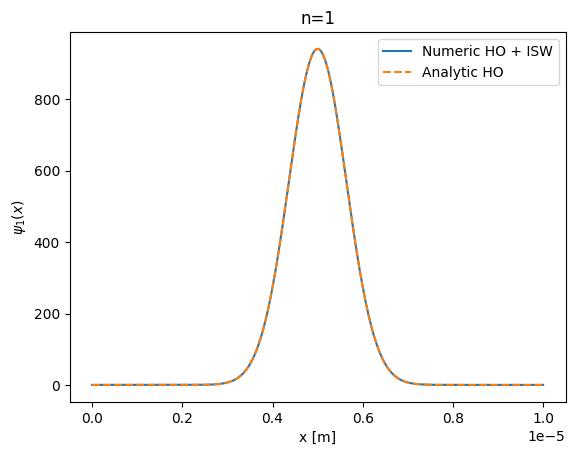

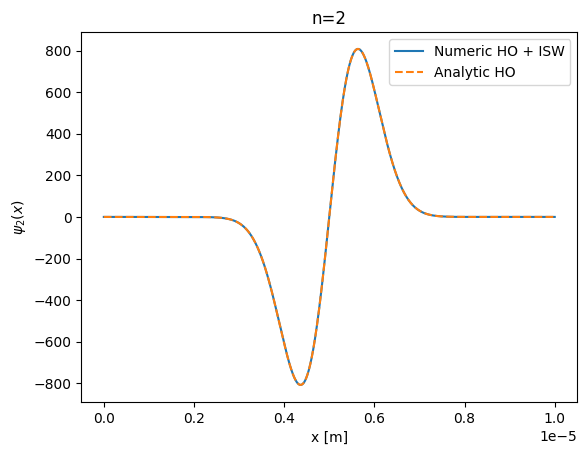

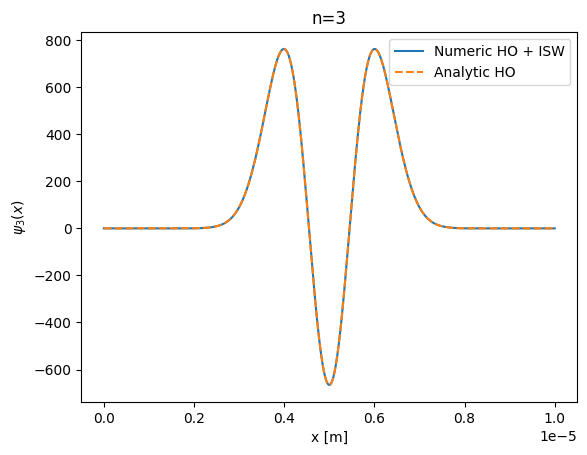

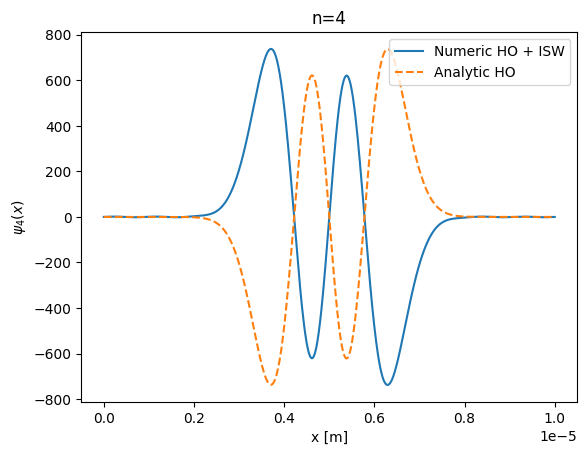

In [6]:
def psi_well(n):

    return lambda x: np.sqrt(2 / a) * np.sin(n * pi * x / a)

N_basis = 21
basis = np.array([psi_well(n) for n in range(1, N_basis + 1)])
psi_clip = np.array([
    np.array([psi_vec[i][j] for i in range(0, N_basis)]) for j in range(0, N_basis)
])

def psi(n):

    return lambda x: np.dot(psi_clip[n], [f(x) for f in basis])

xs = np.linspace(0, a, num=1000)

def plot_psi(n):

    f_numeric = psi(n)
    f_HO = psi_HO(n)

    ys_numeric = f_numeric(xs)
    ys_HO = f_HO(xs)

    plt.plot(xs, ys_numeric, label="Numeric HO + ISW")
    plt.plot(xs, ys_HO, label="Analytic HO", linestyle="dashed")
    plt.ylabel(f"$\\psi_{n+1}(x)$")
    plt.xlabel("x [m]")
    plt.title(f"n={n+1}")
    plt.plot()
    plt.legend()
    plt.show()

# I will plot these separately else there is just too much in one plot
for i in range(0, 4):
    plot_psi(i)

### Some of these plots are the negative of analytic solutions. I don't think this matters since the sign of the wavefunction does not matter in computations.

## 8)

In [7]:
def V(x):

    # REMEMBER TO DISPLACE THIS by a/2
    return m * omega ** 2 * (x - a / 2) ** 2 / 2

def H_nm(n, m):

    integrand = lambda x: 2 / a * np.sin(n * pi * x / a) * V(x) * np.sin(m * pi * x / a)

    xs = np.linspace(0, a, num=10000)
    ys = integrand(xs)
    I = scipy.integrate.trapz(ys, xs)
    
    if n == m:

        E_n = n ** 2 * E_1
        I += E_n

    return I

def H_numeric(npts):
    
    return np.array([
                np.array([
                    H_nm(n, m) for m in range(1, npts + 1)
                ]) 
            for n in range(1, npts + 1)]
        )

# just name it differently to make sure I'm not using the other one
_H = H_numeric(N)

And just copy-pasting everything I had before...

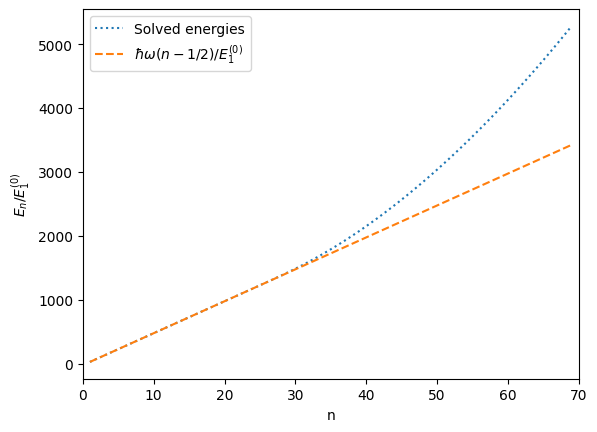

In [8]:
E, psi_vec = scipy.linalg.eigh(_H)

n_list = np.array([n for n in range(1, N + 1)])
E_E1 = E / E_1
E_HO = hbar * omega * (n_list - 1/2) / E_1

plt.plot(n_list[0:69], E_E1[0:69], label="Solved energies", linestyle="dotted")
plt.plot(n_list[0:69], E_HO[0:69], label="$\\hbar\\omega(n-1/2)/E_1^{(0)}$", linestyle="dashed")
plt.xlim(0, 70)
plt.xlabel("n")
plt.ylabel("$E_n/E_1^{(0)}$")
plt.legend()
plt.show()

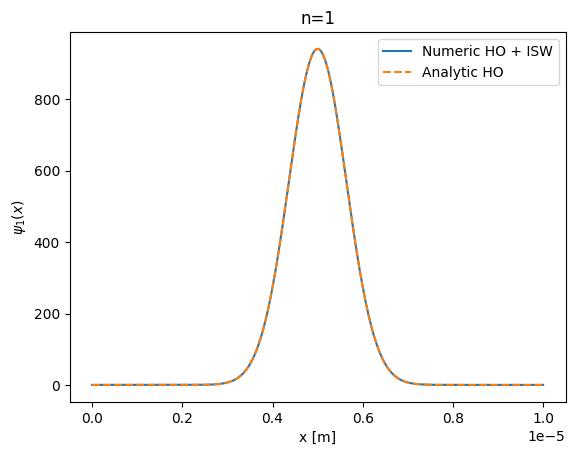

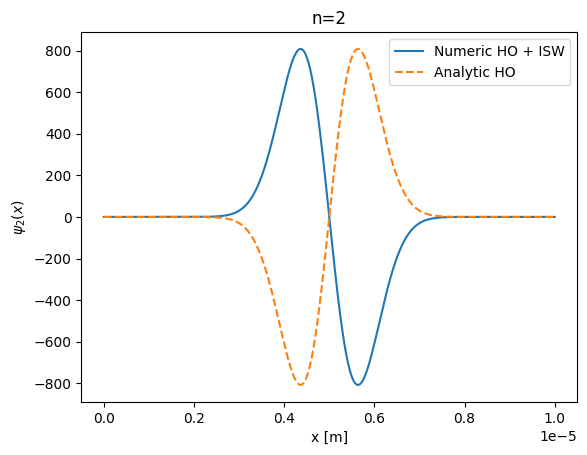

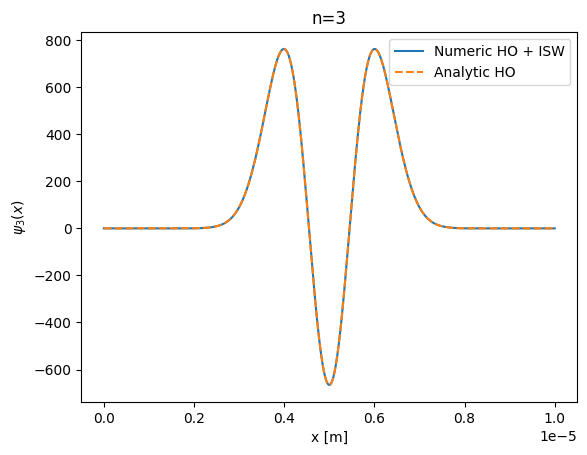

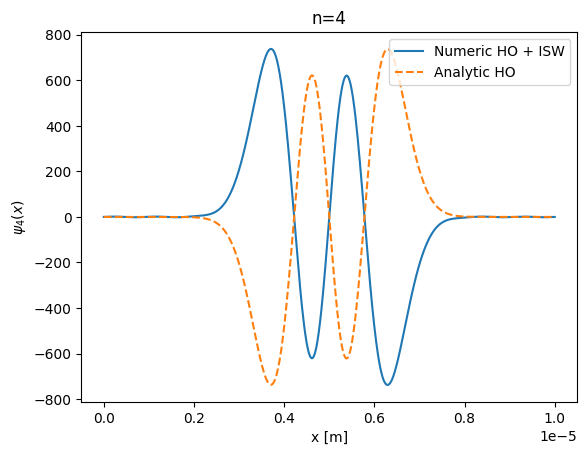

In [9]:
psi_clip = np.array([
    np.array([psi_vec[i][j] for i in range(0, N_basis)]) for j in range(0, N_basis)
])

# the functions plot_psi calls requires these xs to be defined properly
xs = np.linspace(0, a, num=1000)

for i in range(0, 4):
    plot_psi(i)